The Point of this notebook below is to:

- Create 50000 random numbers and then do a univariate analysis on these numbers. This will be based off of a poisson distribution.
- Take 15% of these randomly generate numbers and do a univariate analysis on these numbers.
- Compare these two Univariate analysis

In [214]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import random
import sys
import csv
import re
from scipy import stats

# The cell below is to create the distributions and their samples. Re-running the cell below will require all of the other cells to be run.

In [215]:
# Create the 50000 random sample for the 3 distributions and their random 15% sampling
poisson = pd.DataFrame(data = np.random.poisson(50, 50000))
poisson.sort_values(by = [0], inplace=True, ignore_index = True)
normal = pd.DataFrame(data = np.random.normal(50, 12, 50000)) # mu = 50, sigma = 12, sample size = 50000
normal.sort_values(by = [0], inplace=True, ignore_index = True)
uniform = pd.DataFrame(data = np.random.uniform(0,100,50000)) # continuous uniform
uniform.sort_values(by = [0], inplace=True, ignore_index = True)

combined = pd.concat([poisson, normal, uniform],axis = 1)
combined.columns = ['poisson', 'normal','uniform']


poisson_Small = poisson.sample(frac=0.15, replace=False,  random_state=1)
poisson_Small.sort_values(by = [0], inplace=True, ignore_index = True)
poisson_Small = poisson_Small.reset_index(drop =True)

normal_Small = normal.sample(frac=0.15, replace=False,  random_state=1)
normal_Small.sort_values(by = [0], inplace=True, ignore_index = True)
normal_Small = normal_Small.reset_index(drop =True)

uniform_Small = uniform.sample(frac=0.15, replace=False,  random_state=1)
uniform_Small.sort_values(by = [0], inplace=True, ignore_index = True)
uniform_Small = uniform_Small.reset_index(drop =True)

combined_Small = pd.concat([poisson_Small, normal_Small, uniform_Small],axis = 1)
combined_Small.columns = ['poisson', 'normal','uniform']


"\ndata = np.random.randint(0, 101, size=50000)\ndf_Big = pd.DataFrame(data, columns=['Numbers'])\ndf_Small = df_Big.sample(frac=0.15, replace=False,  random_state=1)\ndf_Small.reset_index(drop=True)\n"

In [216]:
print('original poisson, 2-sided chi^2 test: ' + str(stats.normaltest(combined['poisson'])))
print('original normal, 2-sided chi^2 test: ' + str(stats.normaltest(combined['normal'])))
print('original uniform, 2-sided chi^2 test: ' + str(stats.normaltest(combined['uniform'])))
print('sampled poisson, 2-sided chi^2 test: ' + str(stats.normaltest(combined_Small['poisson'])))
print('sampled normal, 2-sided chi^2 test: ' + str(stats.normaltest(combined_Small['normal'])))
print('sampled uniform, 2-sided chi^2 test: ' + str(stats.normaltest(combined_Small['uniform'])))

original poisson, 2-sided chi^2 test: NormaltestResult(statistic=150.0678318705573, pvalue=2.5893118191801086e-33)
original normal, 2-sided chi^2 test: NormaltestResult(statistic=0.5817979148489719, pvalue=0.7475912127434823)
original uniform, 2-sided chi^2 test: NormaltestResult(statistic=47460.04402146432, pvalue=0.0)
sampled poisson, 2-sided chi^2 test: NormaltestResult(statistic=29.52120766867409, pvalue=3.8864331797200597e-07)
sampled normal, 2-sided chi^2 test: NormaltestResult(statistic=4.218129934181145, pvalue=0.1213513809367524)
sampled uniform, 2-sided chi^2 test: NormaltestResult(statistic=7507.228531154787, pvalue=0.0)


In [217]:
#Below I wanted to see if you decreased the sample size for the population, if it decreased or increased the chance
#That this distribution looked like a normal distribution

pvalue = stats.normaltest(normal_sample[0])[1]
average_pvalue = 0

for x in range(20,0,-1):
    percent = x / 100
    for x in range(0,1000):
        normal_sample = normal.sample(frac=percent, replace=False)
        pvalue = stats.normaltest(normal_sample[0])[1]
        average_pvalue += pvalue
    
    average_pvalue = average_pvalue / 1000
    percent *= 100
    print('The average p-value of 1000 samples that contains '+ str(round(percent,2))+ '% of the population is: ' + str(round(average_pvalue,3)))   

The average p-value of 1000 samples that contains 20.0% of the population is: 0.566
The average p-value of 1000 samples that contains 19.0% of the population is: 0.55
The average p-value of 1000 samples that contains 18.0% of the population is: 0.548
The average p-value of 1000 samples that contains 17.0% of the population is: 0.546
The average p-value of 1000 samples that contains 16.0% of the population is: 0.544
The average p-value of 1000 samples that contains 15.0% of the population is: 0.53
The average p-value of 1000 samples that contains 14.0% of the population is: 0.546
The average p-value of 1000 samples that contains 13.0% of the population is: 0.539
The average p-value of 1000 samples that contains 12.0% of the population is: 0.537
The average p-value of 1000 samples that contains 11.0% of the population is: 0.539
The average p-value of 1000 samples that contains 10.0% of the population is: 0.533
The average p-value of 1000 samples that contains 9.0% of the population is: 0

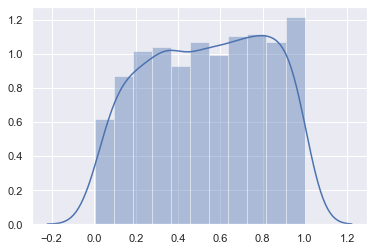

In [219]:
#Below I wanted to see if the chi^2 test was centered around the p-value. It seems that this isn't the case as you
# can see from the graph below. It is weighted towards 1.0 but there are still instances when it can be less than .1
# as can be seen below


df_sample = []
for x in range(0,1000):
    normal_sample = normal.sample(frac=0.15, replace=False)
    pvalue = stats.normaltest(normal_sample[0])[1]
    df_sample.append(pvalue)

sns.distplot(df_sample).plot()
plt.show()    


In [254]:
print('#################################################################')
print('Descriptive statistics on complete dataset')
print('#################################################################')
print(combined.describe())
print('')
print('median:     '+ str(round(combined["poisson"].median(),3))+ '         '+str(round(combined["normal"].median(),3))+'        '+str(round(combined["uniform"].median(),3)))
print('skew:       '+ str(round(combined["poisson"].skew(),3))+ '        '+str(round(combined["normal"].skew(),3))+'        '+str(round(combined["uniform"].skew(),3)))
print('median:     '+ str(round(combined["poisson"].median()))+ '           '+str(round(combined["normal"].median(),2))+'         '+str(round(combined["uniform"].median(),2)))
print('Covariance table below')
print(combined.cov())
print('#################################################################')
print('Descriptive statistics on 15% sample')
print('#################################################################')
print(combined_Small.describe())
print('')
print('median:     '+ str(round(combined_Small["poisson"].median(),3))+ '      '+str(round(combined_Small["normal"].median(),3))+'      '+str(round(combined_Small["uniform"].median(),3)))
print('skew:       '+ str(round(combined_Small["poisson"].skew(),3))+   '      '+str(round(combined_Small["normal"].skew(),3))+'       '+str(round(combined_Small["uniform"].skew(),3)))
print('median:     '+ str(round(combined_Small["poisson"].median()))+   '        '+str(round(combined_Small["normal"].median(),2))+'       '+str(round(combined_Small["uniform"].median(),2)))
print('Covariance table below')
print(combined_Small.cov())

#################################################################
Descriptive statistics on complete dataset
#################################################################
            poisson        normal       uniform
count  50000.000000  50000.000000  50000.000000
mean      50.007940     50.055068     50.131899
std        7.042868     12.051489     28.887159
min       24.000000      3.242011      0.000160
25%       45.000000     41.908922     25.025423
50%       50.000000     50.064082     50.195503
75%       55.000000     58.190579     75.354778
max       93.000000    103.301594     99.997326

median:     50.0         50.064        50.196
skew:       0.135        -0.002        -0.009
median:     50           50.06         50.2
Covariance table below
            poisson      normal     uniform
poisson   49.601989   84.758204  198.531381
normal    84.758204  145.238382  340.131437
uniform  198.531381  340.131437  834.467977
#########################################################

Graphs that represent the populations that were generated


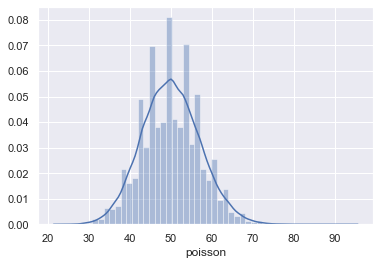

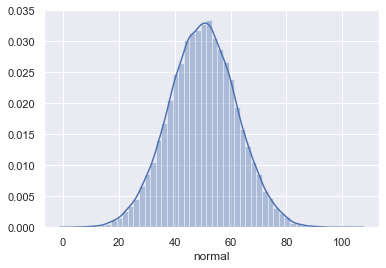

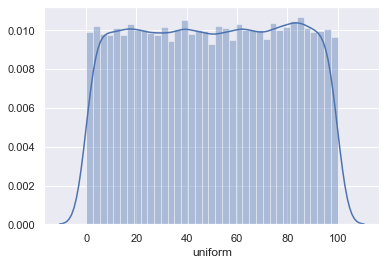

In [220]:
#Graphs created using seaborn to understand the shapes of these distributions

print('Graphs that represent the populations that were generated')
sns.distplot(combined['poisson']).plot()
plt.show()
sns.distplot(combined['normal']).plot()
plt.show()
sns.distplot(combined['uniform']).plot()
plt.show()


Graphs that represent the samples of the populations


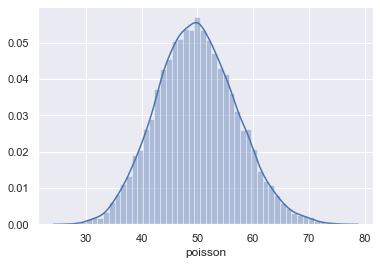

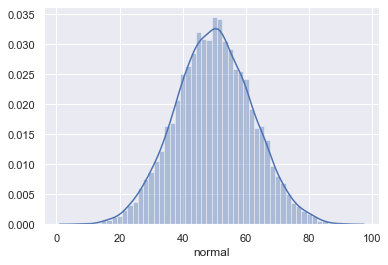

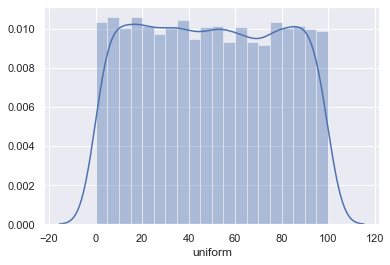

In [256]:
print('Graphs that represent the samples of the populations')
sns.distplot(combined_Small['poisson']).plot()
plt.show()
sns.distplot(combined_Small['normal']).plot()
plt.show()
sns.distplot(combined_Small['uniform']).plot()
plt.show()

50000 Data Sets.              7500 Data Sets.


[]

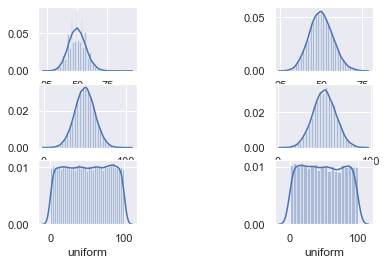

In [222]:
print('50000 Data Sets.              7500 Data Sets.')

fig = plt.figure()

ax1 = fig.add_subplot(331)
ax = sns.distplot(combined['poisson']).plot()

ax2 = fig.add_subplot(334)
sns.distplot(combined['normal']).plot()

ax3 = fig.add_subplot(337)
sns.distplot(combined['uniform']).plot()

ax4 = fig.add_subplot(333)
ax = sns.distplot(combined_Small['poisson']).plot()

ax5 = fig.add_subplot(336)
sns.distplot(combined_Small['normal']).plot()

ax6 = fig.add_subplot(339)
sns.distplot(combined_Small['uniform']).plot()


In [223]:
combined.info()
print('########################################')
combined_Small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   poisson  50000 non-null  int64  
 1   normal   50000 non-null  float64
 2   uniform  50000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   poisson  7500 non-null   int64  
 1   normal   7500 non-null   float64
 2   uniform  7500 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 175.9 KB


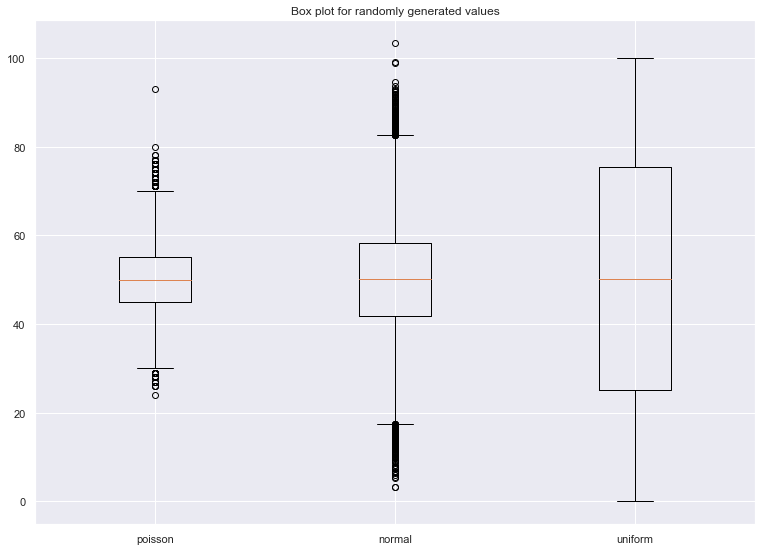

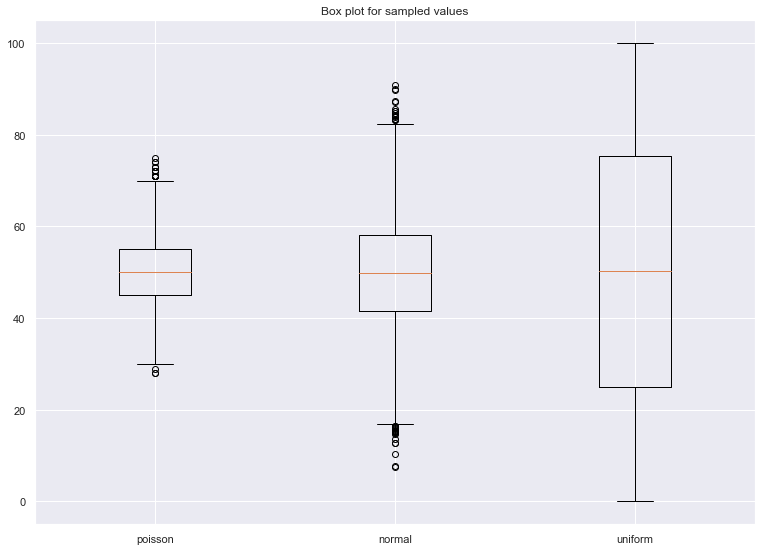

In [224]:
data_1 = combined['poisson']
data_2 = combined['normal']
data_3 = combined['uniform']
data = [data_1, data_2, data_3] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['poisson', 'normal',  'uniform'])

# Creating plot 
bp = ax.boxplot(data) 

plt.title("Box plot for randomly generated values")  
# show plot 
plt.show() 

data_1 = combined_Small['poisson']
data_2 = combined_Small['normal']
data_3 = combined['uniform']
data = [data_1, data_2, data_3] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['poisson', 'normal',  'uniform'])  
# Creating plot 
bp = ax.boxplot(data) 
plt.title("Box plot for sampled values")   
# show plot 
plt.show() 


In [241]:
#As you can see below, this information does not tell us much since all of the distributions are independent
print('Population below')
print(combined.corr())
print('#####################################')
print('Sample below')
print(combined_Small.corr())

Population below
          poisson    normal   uniform
poisson  1.000000  0.998600  0.975831
normal   0.998600  1.000000  0.977015
uniform  0.975831  0.977015  1.000000
#####################################
Sample below
          poisson    normal   uniform
poisson  1.000000  0.998637  0.977045
normal   0.998637  1.000000  0.978085
uniform  0.977045  0.978085  1.000000


In [253]:
corr_poisson = pd.concat([combined['poisson'], combined_Small['uniform']], axis=1, keys=['combined', 'combined_Small'])
corr_normal = pd.concat([combined['normal'], combined_Small['uniform']], axis=1, keys=['combined', 'combined_Small'])
corr_uniform = pd.concat([combined['uniform'], combined_Small['uniform']], axis=1, keys=['combined', 'combined_Small'])

print('Correlations between population and sample for poisson')
print(corr_poisson.corr())
print('')
print('Correlations between population and sample for normal')
print(corr_normal.corr())
print('')
print('Correlations between population and sample for uniform')
print(corr_uniform.corr())
#df_poisson = pd.concat(combined['poisson'],combined_Small['poisson'])
#df.poisson.corr()

Correlations between population and sample for poisson
                combined  combined_Small
combined        1.000000        0.926364
combined_Small  0.926364        1.000000

Correlations between population and sample for normal
                combined  combined_Small
combined        1.000000        0.924276
combined_Small  0.924276        1.000000

Correlations between population and sample for uniform
                combined  combined_Small
combined        1.000000        0.999958
combined_Small  0.999958        1.000000


In [255]:
#Below are t-tests that look at the differences between the population and the sample sets
#The T-value means the multiple of how different the distributions are from each other
print('Showing the t-test done for the poisson distribution below:')
t_test = stats.ttest_ind(combined['poisson'], combined_Small['poisson'])
print('The t-value of the original data set and the sample data set are ' + str(round(t_test[0],4)))
print('The p-value of the original data set and the sample data set are ' + str(round(t_test[1],4)))
print('########################################################################')
print('Showing the t-test done for the normal distribution below:')
t_test = stats.ttest_ind(combined['normal'], combined_Small['normal'])
print('The t-value of the original data set and the sample data set are ' + str(round(t_test[0],4)))
print('The p-value of the original data set and the sample data set are ' + str(round(t_test[1],4)))
print('########################################################################')
print('Showing the t-test done for the uniform distribution below:')
t_test = stats.ttest_ind(combined['uniform'], combined_Small['uniform'])
print('The t-value of the original data set and the sample data set are ' + str(round(t_test[0],4)))
print('The p-value of the original data set and the sample data set are ' + str(round(t_test[1],4)))

Showing the t-test done for the poisson distribution below:
The t-value of the original data set and the sample data set are 1.4477
The p-value of the original data set and the sample data set are 0.1477
########################################################################
Showing the t-test done for the normal distribution below:
The t-value of the original data set and the sample data set are 1.5139
The p-value of the original data set and the sample data set are 0.1301
########################################################################
Showing the t-test done for the uniform distribution below:
The t-value of the original data set and the sample data set are 1.6239
The p-value of the original data set and the sample data set are 0.1044


# Results
Contained in the write up